In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.layers import Dropout
from keras import regularizers

C:\Users\Tjipto\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('housepricedata.csv')

In [3]:
df.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [4]:
dataset = df.values

In [5]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

In [6]:
X = dataset[:,0:10]

In [7]:
Y = dataset[:,10]

In [8]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [9]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [10]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [11]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [12]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [13]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

1. Hidden layer 1: 32 neurons, ReLU activation
2. Hidden layer 2: 32 neurons, ReLU activation
3. Output Layer: 1 neuron, Sigmoid activation

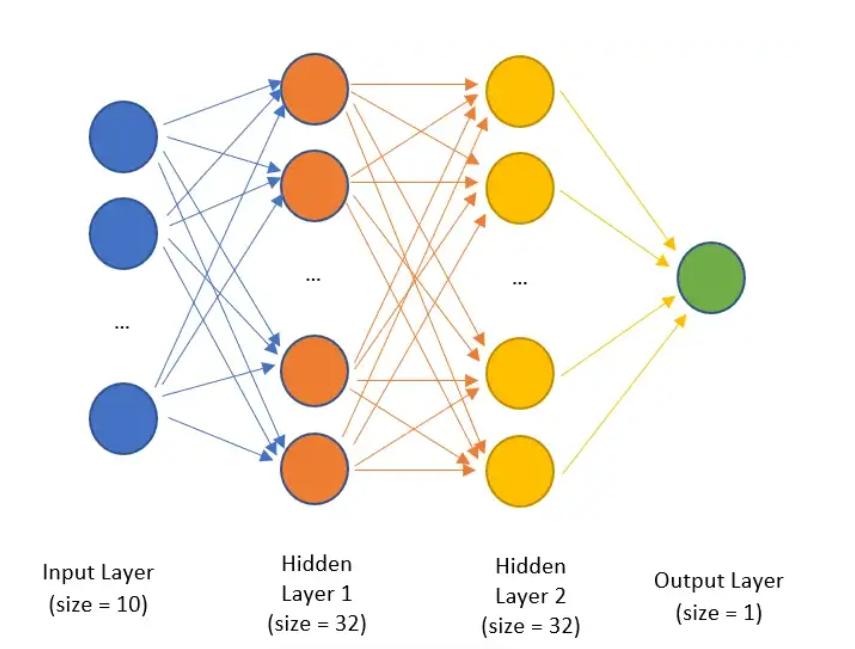

In [14]:
# Stochastic Gradient Descent (SGD)
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [15]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100


32/32 [==============================] - 1s 13ms/step - loss: 0.6860 - accuracy: 0.5538 - val_loss: 0.6810 - val_accuracy: 0.5662
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6735 - accuracy: 0.5812 - val_loss: 0.6722 - val_accuracy: 0.5342
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6640 - accuracy: 0.5802 - val_loss: 0.6643 - val_accuracy: 0.5525
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6555 - accuracy: 0.5890 - val_loss: 0.6564 - val_accuracy: 0.6073
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6474 - accuracy: 0.6204 - val_loss: 0.6486 - val_accuracy: 0.6621
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6395 - accuracy: 0.6791 - val_loss: 0.6411 - val_accuracy: 0.6895
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6315 - accuracy: 0.6888 - val_loss: 0.6332 - val_accuracy: 0.7169
Epoch 8/10

In [16]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 5ms/step - loss: 0.3508 - accuracy: 0.8402


0.8401826620101929

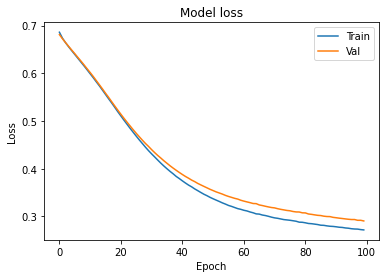

In [17]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

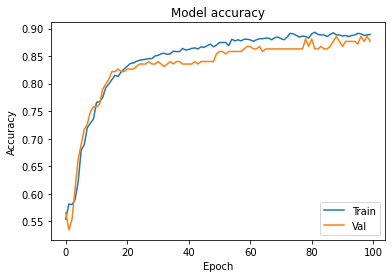

In [18]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

For the sake of introducing regularization to our neural network, let’s formulate with a neural network that will badly overfit on our training set. We’ll call this Model 2.
Here, we’ve made a much larger model and we’ve use the Adam optimizer. Adam is one of the most common optimizers we use, which adds some tweaks to stochastic gradient descent such that it reaches the lower loss function faster. If we run this code and plot the loss graphs for hist_2 using the code below (note that the code is the same except that we use ‘hist_2’ instead of ‘hist’):

In [19]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 23ms/step - loss: 0.4103 - accuracy: 0.8209 - val_loss: 0.3419 - val_accuracy: 0.8493
Epoch 2/100
32/32 [==============================] - 1s 16ms/step - loss: 0.3348 - accuracy: 0.8787 - val_loss: 0.3027 - val_accuracy: 0.8584
Epoch 3/100
32/32 [==============================] - 1s 19ms/step - loss: 0.2933 - accuracy: 0.8748 - val_loss: 0.2692 - val_accuracy: 0.8539
Epoch 4/100
32/32 [==============================] - 1s 20ms/step - loss: 0.2892 - accuracy: 0.8806 - val_loss: 0.2387 - val_accuracy: 0.9041
Epoch 5/100
32/32 [==============================] - 1s 18ms/step - loss: 0.2473 - accuracy: 0.8973 - val_loss: 0.2498 - val_accuracy: 0.8858
Epoch 6/100
32/32 [==============================] - 1s 18ms/step - loss: 0.2917 - accuracy: 0.8875 - val_loss: 0.2474 - val_accuracy: 0.8767
Epoch 7/100
32/32 [==============================] - 1s 17ms/step - loss: 0.2465 - accuracy: 0.8973 - val_loss: 0.2213 - val_accuracy: 0.9041
Epoch 

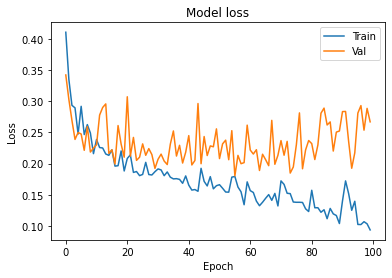

In [20]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

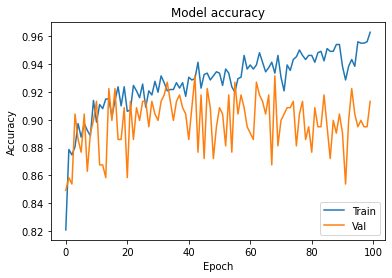

In [21]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [22]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [23]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 27ms/step - loss: 14.2324 - accuracy: 0.6135 - val_loss: 3.8998 - val_accuracy: 0.8265
Epoch 2/100
32/32 [==============================] - 1s 21ms/step - loss: 1.6885 - accuracy: 0.8337 - val_loss: 0.6997 - val_accuracy: 0.8265
Epoch 3/100
32/32 [==============================] - 1s 23ms/step - loss: 0.5750 - accuracy: 0.8503 - val_loss: 0.5072 - val_accuracy: 0.8630
Epoch 4/100
32/32 [==============================] - 1s 25ms/step - loss: 0.5192 - accuracy: 0.8591 - val_loss: 0.4984 - val_accuracy: 0.8904
Epoch 5/100
32/32 [==============================] - 1s 23ms/step - loss: 0.5173 - accuracy: 0.8620 - val_loss: 0.5416 - val_accuracy: 0.8356
Epoch 6/100
32/32 [==============================] - 1s 23ms/step - loss: 0.4842 - accuracy: 0.8826 - val_loss: 0.4649 - val_accuracy: 0.8630
Epoch 7/100
32/32 [==============================] - 1s 23ms/step - loss: 0.4692 - accuracy: 0.8885 - val_loss: 0.4633 - val_accuracy: 0.8904
Epoch

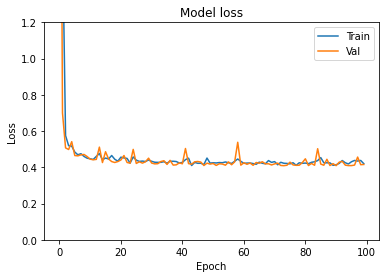

In [24]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

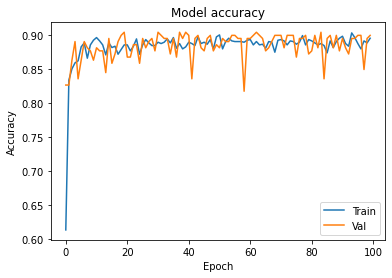

In [25]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()